In [46]:
# Import Librarries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [47]:
# Load dataset
df = pd.read_csv('mushroom.csv')
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


EDA

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [49]:
df.isna().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


In [50]:

df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [51]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [52]:
df.describe()

,stalk_height,cap_diameter
count,2000.000000,2000.000000
mean,8.449118,12.314345
std,3.697217,7.048845
min,2.000000,1.000000
25%,5.291009,5.723521
50%,8.318596,12.124902
75%,11.781272,18.698605
max,15.095066,25.000054


In [53]:
numerical_cols = []
categorical_cols = []

In [54]:
for i in df.columns:
    if df[i].dtype == 'object':
        categorical_cols.append(i)
    else:
        numerical_cols.append(i)

In [55]:
categorical_cols

['cap_shape',
 'cap_surface',
 'cap_color',
 'bruises',
 'odor',
 'gill_attachment',
 'gill_spacing',
 'gill_size',
 'gill_color',
 'stalk_shape',
 'stalk_root',
 'stalk_surface_above_ring',
 'stalk_surface_below_ring',
 'stalk_color_above_ring',
 'stalk_color_below_ring',
 'veil_type',
 'veil_color',
 'ring_number',
 'ring_type',
 'spore_print_color',
 'population',
 'habitat',
 'class']

In [56]:
numerical_cols

['stalk_height', 'cap_diameter']

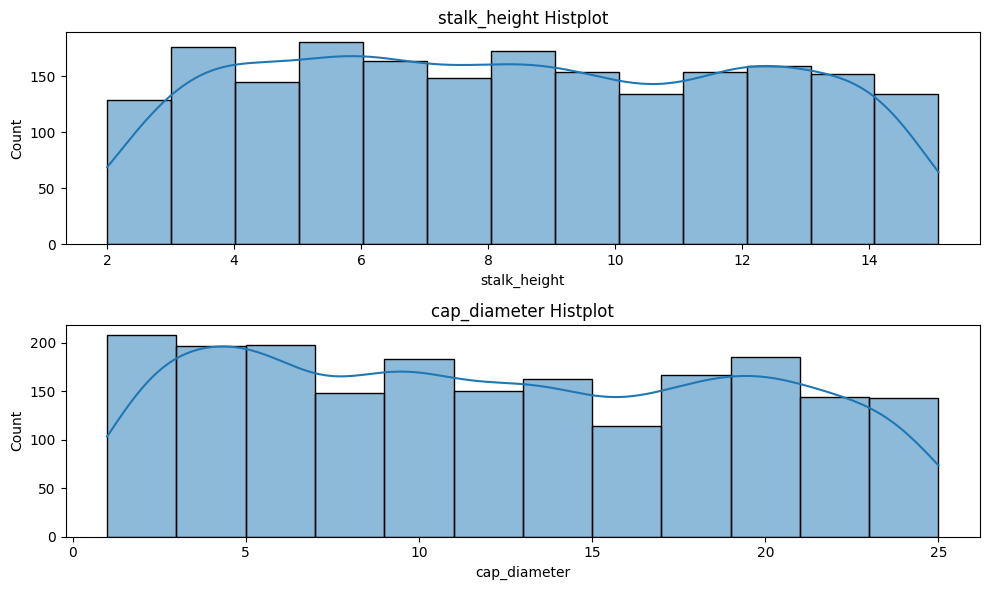

In [57]:
# Data Visualization

plt.figure(figsize=(10,len(numerical_cols)*3))
for i,fe in enumerate(numerical_cols,1):
    plt.subplot(len(numerical_cols),1,i)
    sn.histplot(data=df, x=fe, kde=True, palette='viridis')
    plt.title(f'{fe} Histplot')
    plt.xlabel(fe)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

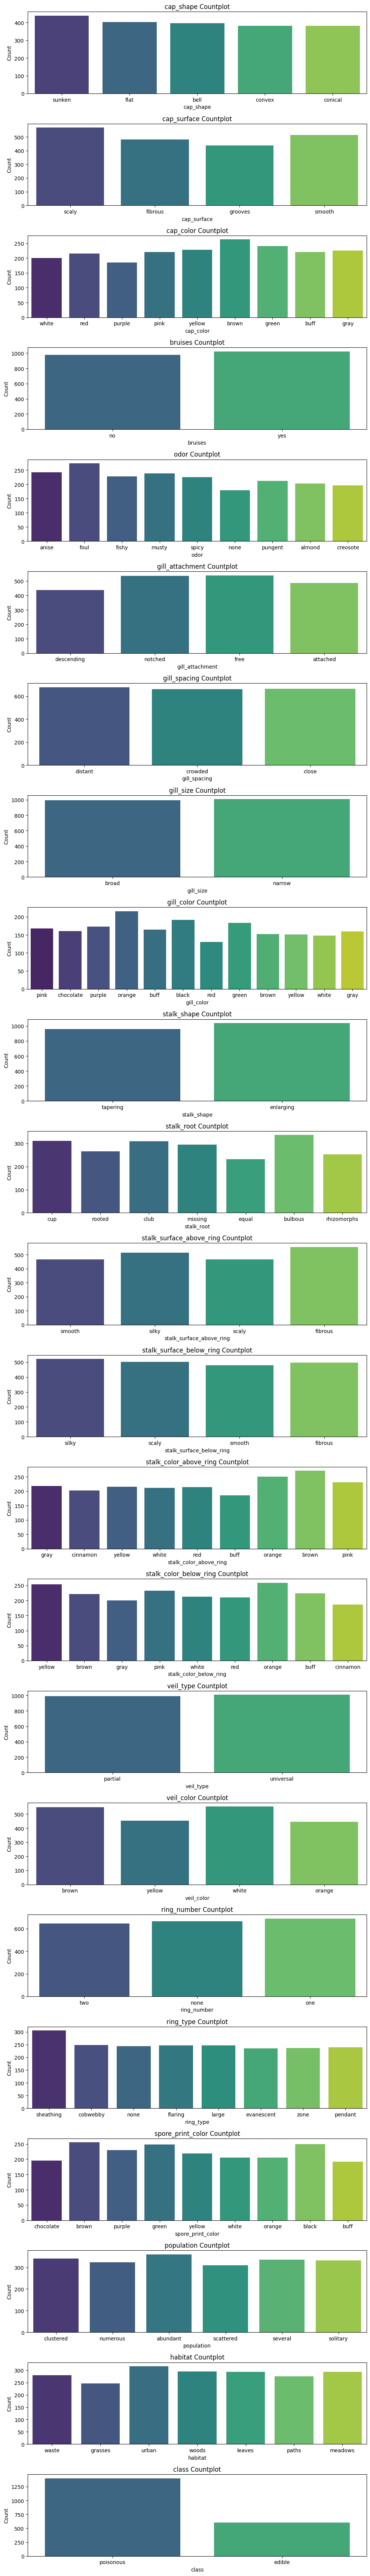

In [58]:
plt.figure(figsize=(10,len(categorical_cols)*3))
for i,fe in enumerate(categorical_cols,1):
    plt.subplot(len(categorical_cols),1,i)
    sn.countplot(data=df, x=fe, palette='viridis')
    plt.title(f'{fe} Countplot')
    plt.xlabel(fe)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

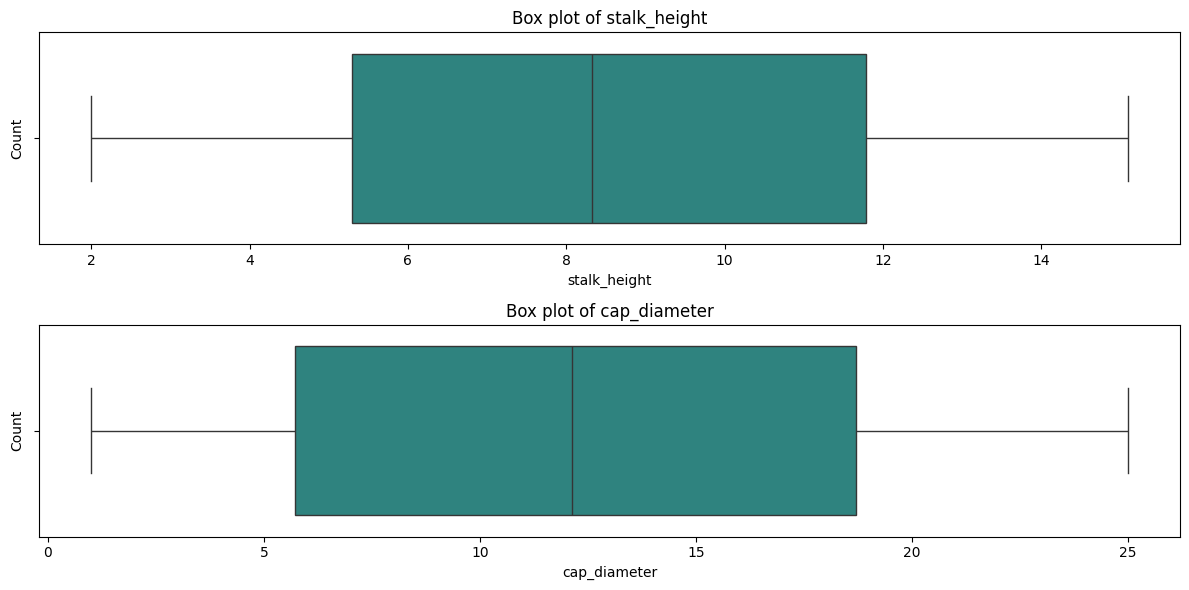

In [59]:
plt.figure(figsize=(12,len(numerical_cols)*3))
for i,fe in enumerate(numerical_cols,1):
    plt.subplot(len(numerical_cols),1,i)
    sn.boxplot(data=df,x=fe,palette='viridis')
    plt.title(f"Box plot of {fe}")
    plt.xlabel(fe)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

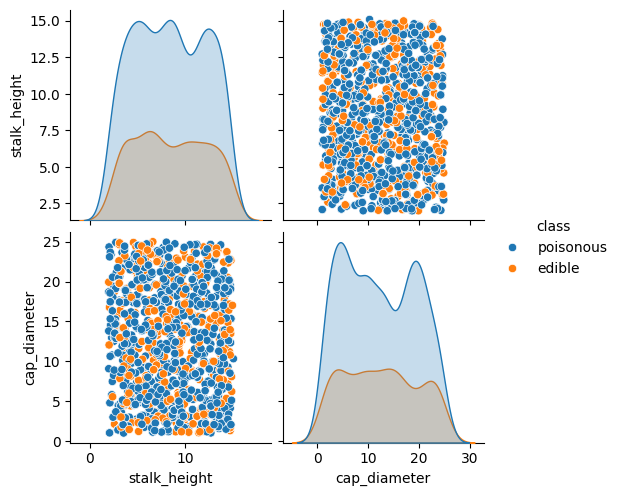

In [60]:
sn.pairplot(df,hue='class')

Data Preprocessing

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le = LabelEncoder()

In [63]:
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [64]:
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,916,190
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,128,750
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,537,281
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,234,829
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,895,484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,2,0,1,4,0,1,1,3,1,...,0,1,1,2,6,0,1,1,283,680
1996,4,2,5,1,5,0,2,1,9,1,...,0,2,1,7,8,2,5,1,335,521
1997,2,1,3,1,3,3,0,1,7,1,...,0,0,2,1,8,0,6,1,859,438
1998,0,3,7,0,7,2,0,1,6,0,...,1,3,1,0,1,5,6,1,679,320


In [65]:
# Splitting data

from sklearn.model_selection import train_test_split

In [66]:
X = df.drop('class',axis=1)
y = df['class']

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

SVM Implementation

In [68]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [69]:
model = SVC()

In [70]:
model.fit(X_train,y_train)

SVC()

In [71]:
y_pred = model.predict(X_test)

In [72]:
accuracy_score(y_test,y_pred)

0.6675

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
confusion_matrix(y_test,y_pred)

array([[  0, 133],
       [  0, 267]])

Parameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV


In [91]:
param_grid = {'C':[0.1,1,10],'kernel':['linear','rbf','poly']}

In [92]:
gsv = GridSearchCV(SVC(),param_grid,cv=5)

In [93]:
gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

In [94]:
print("Best parameters:", gsv.best_params_)

Best parameters: {'C': 0.1, 'kernel': 'linear'}


In [95]:
gsv.best_score_

0.7081250000000001

In [96]:
model = SVC(C = 0.1, kernel = 'linear')

In [97]:
model.fit(X_train,y_train)

SVC(C=0.1, kernel='linear')

In [98]:
y_pred = model.predict(X_test)

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



In [100]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6675


Compare SVM Performance with Various Kernels

In [101]:
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    print(f"Kernel: {kernel}, Accuracy: {accuracy_score(y_test, y_pred)}")

Kernel: linear, Accuracy: 0.6675
Kernel: rbf, Accuracy: 0.6675
Kernel: poly, Accuracy: 0.6675


Strengths and Weaknesses of SVM for the Mushroom Dataset

Strengths:

  * Clear Class Separation
  * Handling Non-Linear Boundaries
  * Robustness to Overfitting with  
     Proper Tuning
  * Featue Importance

Weaknesses:

   * Sensitivity to Outliers
   * Computational Complexity
   *  Interpretability Challenges
   * Parameter Sensitivity